In [3]:
import pandas as pd

# Load dataset using given file path
file_path = r"C:\Users\KIIT0001\Desktop\Research_01\Mental Health Dataset.csv"
df = pd.read_csv(file_path)

print(df.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [5]:
import pandas as pd
import numpy as np
import time
import os

# =============================
# LOAD ORIGINAL DATASET
# =============================
input_path = r"C:\Users\KIIT0001\Desktop\Research_01\Mental Health Dataset.csv"
df = pd.read_csv(input_path)

# =============================
# DROP IRRELEVANT COLUMNS
# =============================
df.drop(columns=["Timestamp", "Country"], inplace=True, errors="ignore")

# =============================
# HANDLE INITIAL MISSING VALUES
# =============================
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# =============================
# DAYS_INDOORS → ORDINAL ENCODING
# =============================
days_mapping = {
    "1-14 days": 1,
    "15-30 days": 2,
    "31-60 days": 3,
    "More than 2 months": 4
}
df["Days_Indoors"] = df["Days_Indoors"].map(days_mapping)

# =============================
# TEXT STANDARDIZATION
# =============================
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.lower().str.strip()

# =============================
# LABEL ENCODING (YES / NO)
# Mood_Swings EXCLUDED
# =============================
binary_mapping = {"yes": 1, "no": 0}

label_encode_cols = [
    "self_employed",
    "family_history",
    "treatment",
    "Coping_Struggles",
    "Work_Interest",
    "care_options",
    "Growing_Stress"
]

for col in label_encode_cols:
    df[col] = df[col].map(binary_mapping)

# =============================
# FIX SELF_EMPLOYED MISSING VALUES
# =============================
df["self_employed"] = df["self_employed"].fillna(df["self_employed"].mode()[0])

# =============================
# MOOD_SWINGS → ORDINAL LABEL ENCODING
# low=0, medium=1, high=2
# =============================
mood_mapping = {
    "low": 0,
    "medium": 1,
    "high": 2
}
df["Mood_Swings"] = df["Mood_Swings"].map(mood_mapping)

# =============================
# MEDIAN IMPUTATION
# =============================
df["care_options"] = df["care_options"].fillna(df["care_options"].median())

# =============================
# OCCUPATION ENCODING
# =============================
occupation_mapping = {
    "student": 0,
    "corporate": 1,
    "business": 1,
    "house wife": 0,
    "others": 0
}
df["Occupation"] = df["Occupation"].map(occupation_mapping).fillna(0)

# =============================
# GENDER ENCODING
# =============================
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "male" else 0)

# =============================
# ONE-HOT ENCODING
# Mood_Swings EXCLUDED
# =============================
one_hot_cols = [
    "Changes_Habits",
    "Mental_Health_History",
    "Social_Weakness",
    "mental_health_interview"
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

# =============================
# FINAL MODE IMPUTATION
# =============================
mode_cols = ["Days_Indoors", "Growing_Stress", "Work_Interest"]

for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# =============================
# FINAL CHECK
# =============================
print("\nFinal Dataset Info:")
print(df.info())

print("\nFinal Missing Value Check:")
print(df[mode_cols].isnull().sum())

# =============================
# SAVE FINAL CLEANED DATASET
# =============================
output_path = r"C:\Users\KIIT0001\Desktop\cleaned_final_01.csv"
df.to_csv(output_path, index=False)

print("\n✅ FINAL CLEANED DATASET SAVED SUCCESSFULLY AT:")
print(output_path)



Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         292364 non-null  int64  
 1   Occupation                     292364 non-null  float64
 2   self_employed                  292364 non-null  int64  
 3   family_history                 292364 non-null  int64  
 4   treatment                      292364 non-null  int64  
 5   Days_Indoors                   292364 non-null  float64
 6   Growing_Stress                 292364 non-null  float64
 7   Mood_Swings                    292364 non-null  int64  
 8   Coping_Struggles               292364 non-null  int64  
 9   Work_Interest                  292364 non-null  float64
 10  care_options                   292364 non-null  float64
 11  Changes_Habits_maybe           292364 non-null  bool   
 12  Changes_H

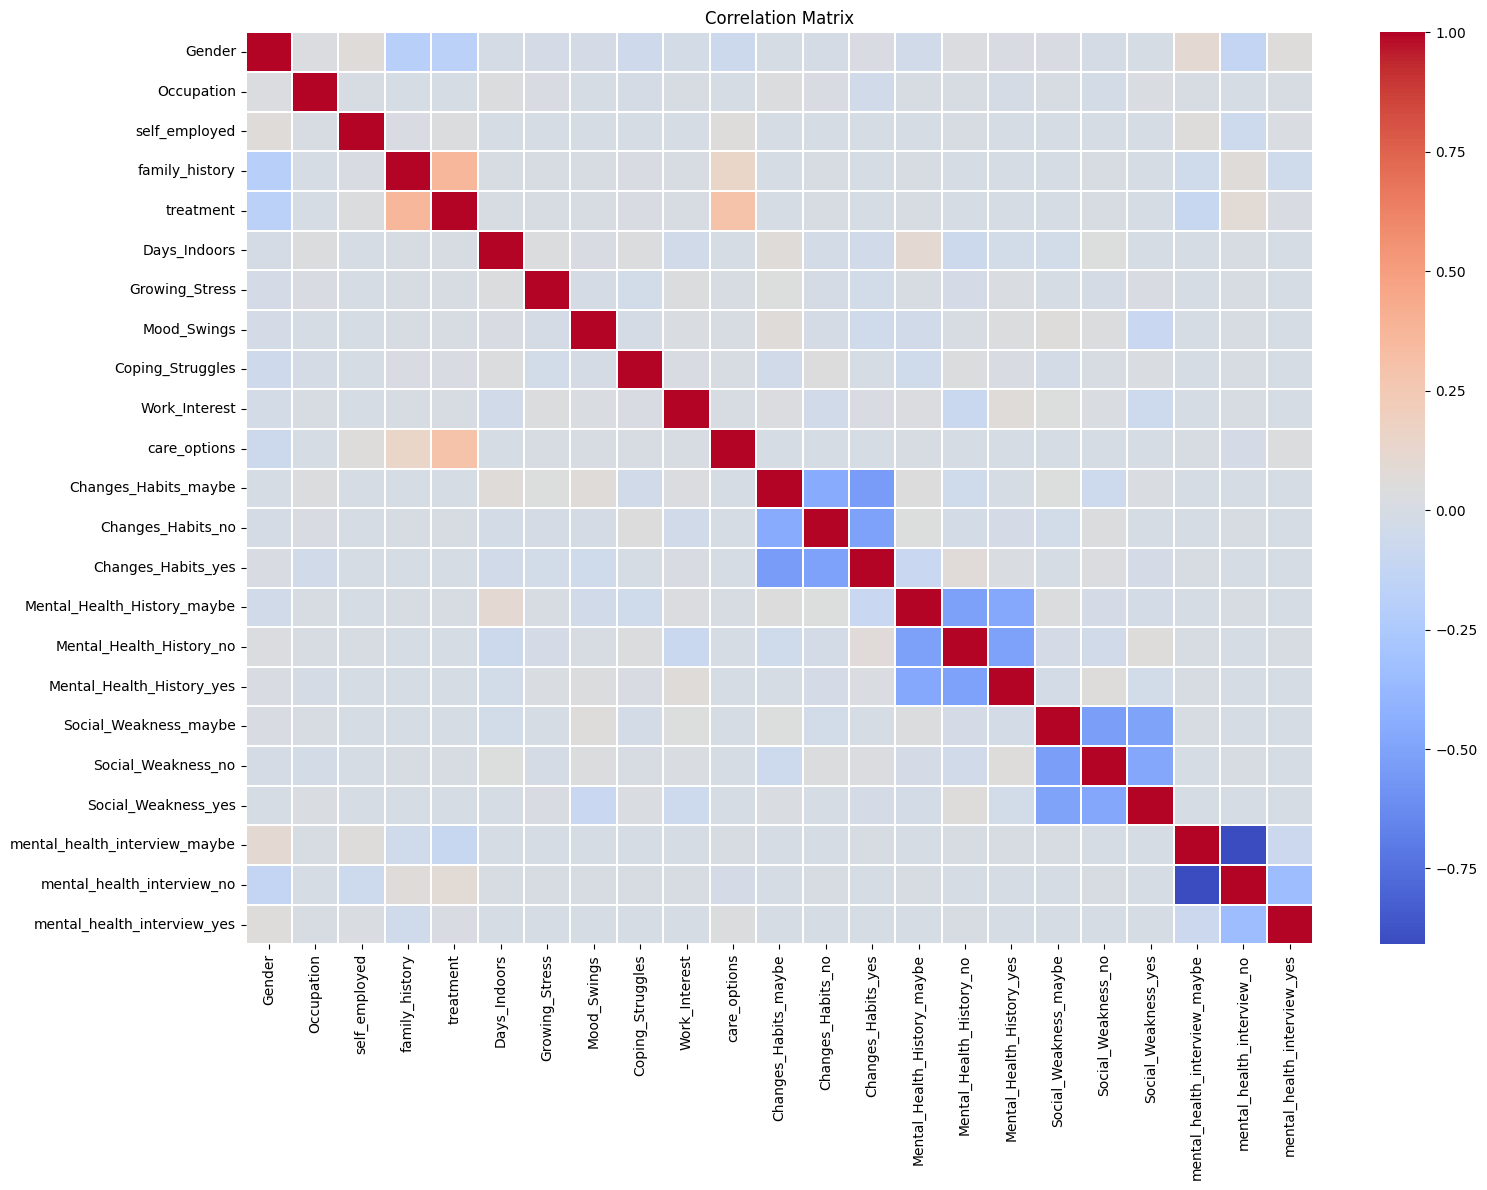

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\KIIT0001\Desktop\Research_01\cleaned_final_01.csv"
df = pd.read_csv(path)

# Force numeric conversion
df_numeric = df.apply(pd.to_numeric, errors="coerce")
df_numeric = df_numeric.dropna(axis=1, how="all")

if df_numeric.shape[1] >= 2:
    corr_matrix = df_numeric.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.3)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns to plot correlation heatmap.")
